# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = study_data_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Turn the Mouse_ID and timepoint columns to lists 
mouse_ids = study_data_complete['Mouse ID']
timepoints = study_data_complete['Timepoint']

combined_data = list(zip(mouse_ids, timepoints))

count_dict = {}
duplicate_mice = set()

for item in combined_data:
    if item in count_dict:
        count_dict[item] += 1
        if count_dict[item] > 1:
            duplicate_mice.add(item[0])
    else:
        count_dict[item] = 1

duplicate_mice_array = np.array(list(duplicate_mice), dtype=object)

duplicate_mice_array

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#I used https://pandas.pydata.org/ to search for the panda function to call other elements and review some panda functions we didn't learn in class 
duplicate_data = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mice)]
duplicate_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_data)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_data["Mouse ID"].nunique()-1
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


#Get the variables 
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

#put the variables into a table
summary_tumor_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

print(summary_tumor_stat)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

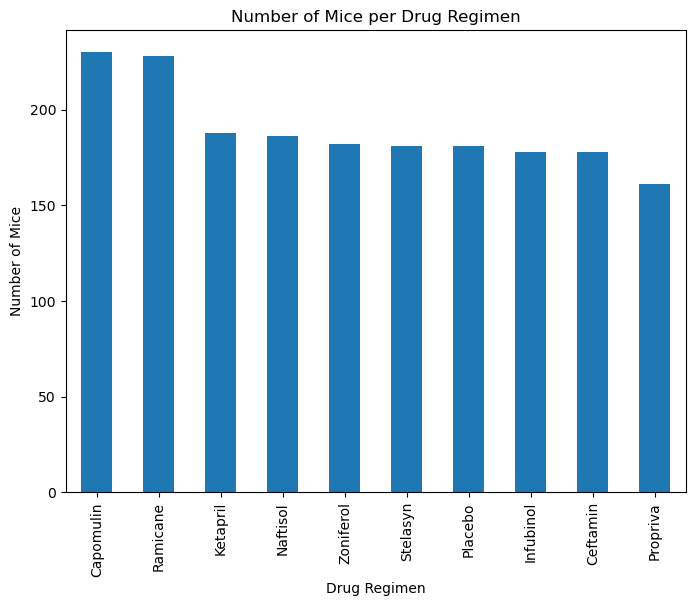

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Group clean data by Drug Regimen and get counts 
mice_count = clean_data["Drug Regimen"].value_counts()

mice_count.plot(kind='bar', figsize=(8, 6))
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show();


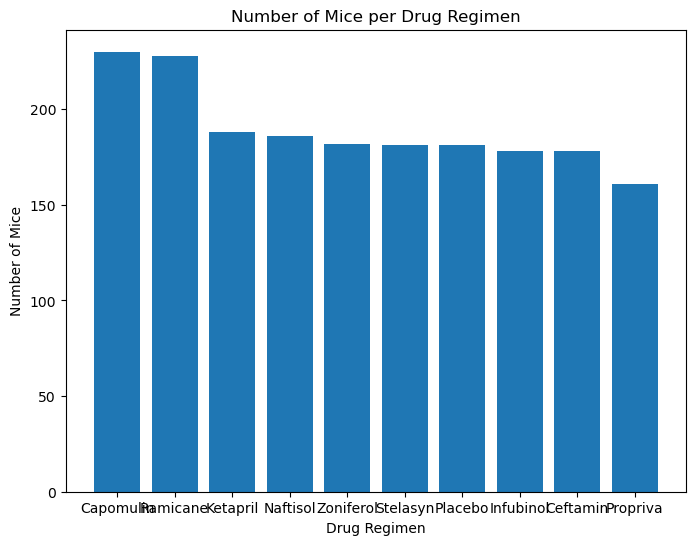

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_count = clean_data["Drug Regimen"].value_counts()

x_values = mice_count.index
y_values = mice_count.values

plt.figure(figsize=(8, 6))
plt.bar(x_values, y_values)
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.show();

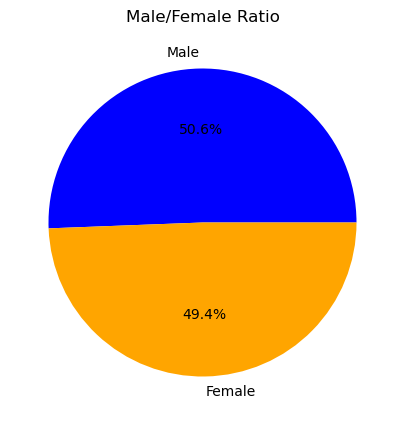

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_data['Sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Male/Female Ratio')
plt.show();


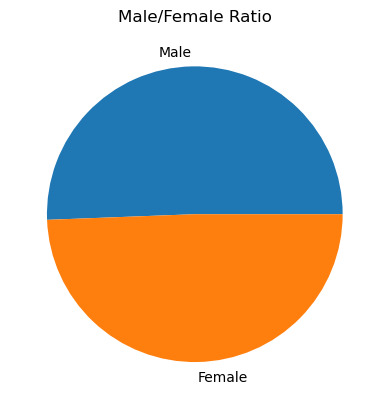

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_data['Sex'].value_counts()
fig = plt.pie(sex_counts.values, 
              labels=sex_counts.index)
plt.title('Male/Female Ratio')
plt.show();

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ramicane = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
infubinol = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_capomulin = capomulin.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_ramicane = ramicane.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_infubinol = infubinol.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_ceftamin = ceftamin.groupby('Mouse ID')['Timepoint'].max()

capomulin_max = pd.DataFrame(last_timepoint_capomulin)
ramicane_max = pd.DataFrame(last_timepoint_ramicane)
infubinol_max = pd.DataFrame(last_timepoint_infubinol)
ceftamin_max = pd.DataFrame(last_timepoint_ceftamin)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_data_capomulin = pd.merge(clean_data, last_timepoint_capomulin, on=['Mouse ID', 'Timepoint'], how='right')
clean_data_ramicane = pd.merge(clean_data, last_timepoint_ramicane, on=['Mouse ID', 'Timepoint'], how='right')
clean_data_infubinol = pd.merge(clean_data, last_timepoint_infubinol, on=['Mouse ID', 'Timepoint'], how='right')
clean_data_ceftamin = pd.merge(clean_data, last_timepoint_ceftamin, on=['Mouse ID', 'Timepoint'], how='right')


clean_data_all_vol = pd.concat([clean_data_capomulin, clean_data_ramicane, clean_data_infubinol, clean_data_ceftamin])

clean_data_all_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
values_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in values_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    locate_rows = clean_data_all_vol.loc[clean_data_all_vol["Drug Regimen"]== x, "Tumor Volume (mm3)"]

    quartiles = locate_rows.quantile([.25, .5, .75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    iqr = (upper_quart - lower_quart)
    tumor_vol_data.append(iqr)
    
    # add subset 
    lower_bound = (lower_quart - (1.5*iqr))
    upper_bound = (upper_quart + (1.5*iqr))
    
    # Determine outliers using upper and lower bounds
    print(f"The IQR for {x} is {iqr} and potential outliers are below {lower_quart} and above {upper_quart}.")


The IQR for Capomulin is 7.781863460000004 and potential outliers are below 32.37735684 and above 40.1592203.
The IQR for Ramicane is 9.098536719999998 and potential outliers are below 31.56046955 and above 40.65900627.
The IQR for Infubinol is 11.477135160000003 and potential outliers are below 54.04860769 and above 65.52574285.
The IQR for Ceftamin is 15.577752179999997 and potential outliers are below 48.72207785 and above 64.29983003.


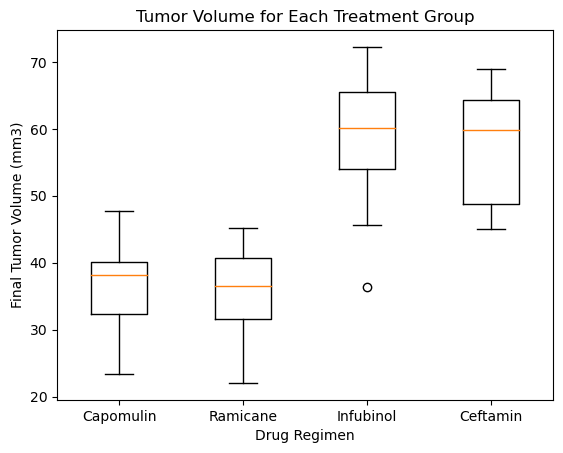

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [
    clean_data_capomulin['Tumor Volume (mm3)'],
    clean_data_ramicane['Tumor Volume (mm3)'],
    clean_data_infubinol['Tumor Volume (mm3)'],
    clean_data_ceftamin['Tumor Volume (mm3)']
]

values_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=values_treatments)
plt.show();

## Line and Scatter Plots

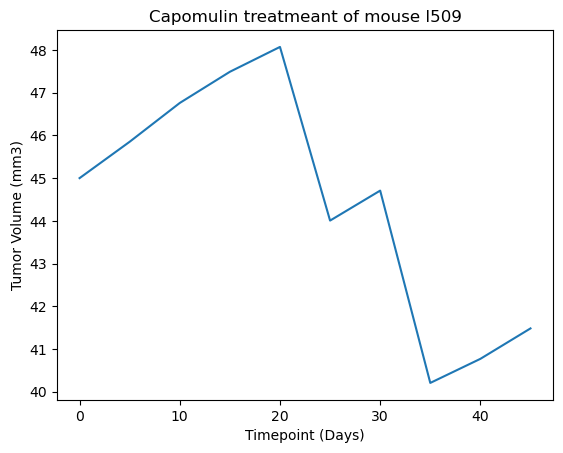

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_1509 = capomulin.loc[capomulin["Mouse ID"] == "l509",:]

#Display to check am pulling the right data set to plot
#forline_1509.head()

x_axis = forline_1509["Timepoint"]
tumor_vol_1509 = forline_1509["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_vol_1509, label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show();

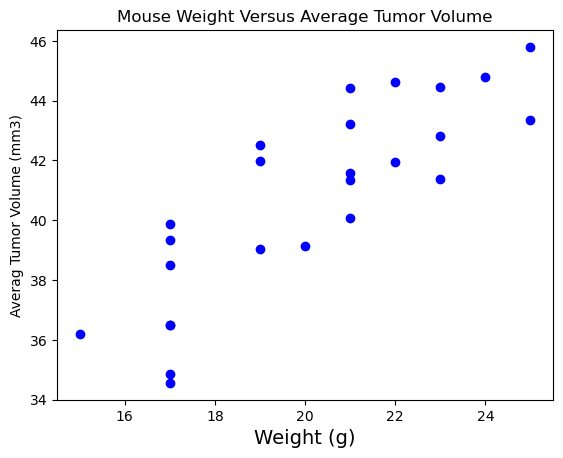

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#fig1, ax1 = plt.subplots()
avg_capm_vol = capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
#avg_capm_vol.head()

mouse_weight = capomulin.groupby(["Mouse ID"])["Weight (g)"].first()
#mouse_weight.head()

marker_size=15
plt.scatter(mouse_weight,avg_capm_vol, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show();


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


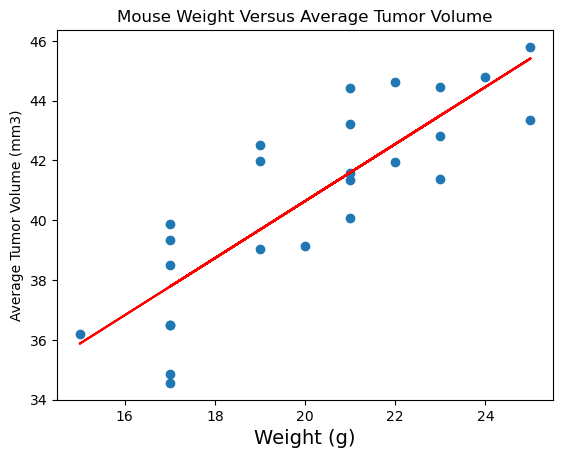

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Correlation statement
avg_tumor_volume = avg_capm_vol.tolist()
weight = mouse_weight.tolist()

correlation = st.pearsonr(avg_tumor_volume, weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#linear regression model 
X = mouse_weight.values  
y = avg_capm_vol.values

slope, intercept = np.polyfit(X, y, 1) 

regress_values = slope * X + intercept

plt.scatter(X, y)
plt.plot(X, regress_values, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show();
